In [ ]:
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Here we import a csv data set
# Make sure that the data and your jupyter code are inside the same folder
data = pd.read_csv('StudentsPerformance.csv') # does any one knows how to upload data from colab

# Source

NAME: Sonar, Mines vs. Rocks

SUMMARY: This is the data set used by Gorman and Sejnowski in their study
of the classification of sonar signals using a neural network [1].  The
task is to train a network to discriminate between sonar signals bounced
off a metal cylinder and those bounced off a roughly cylindrical rock.

SOURCE: The data set was contributed to the benchmark collection by Terry
Sejnowski, now at the Salk Institute and the University of California at
San Deigo.  The data set was developed in collaboration with R. Paul
Gorman of Allied-Signal Aerospace Technology Center.

# How does the data look like?

In [ ]:
# We check for mising values. The result 0 shows that there is not any missing values, 
# otherwise, the output will be greater than 0
data.isnull().sum().sum()

0

In [ ]:
# We want to have a look at the first 5 data points.

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(data.gender('female'))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
X = data.drop(['math score','reading score','writing score'], axis=1) # drop removes the column named 'R' out of the dataset 'data'
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


In [ ]:
cat_data = data.select_dtypes(include=['object']).copy()
cat_data

cat_data_lc = cat_data.copy()
cat_data_lc['gender'] = cat_data_lc['gender'].astype('category')
cat_data_lc['race/ethnicity'] = cat_data_lc['race/ethnicity'].astype('category')
cat_data_lc['parental level of education'] = cat_data_lc['parental level of education'].astype('category')
cat_data_lc['lunch'] = cat_data_lc['lunch'].astype('category')
cat_data_lc['test preparation course'] = cat_data_lc['test preparation course'].astype('category')
  
      #Encoding Categorical Data

cat_data_lc['gender'] = cat_data_lc['gender'].cat.codes
cat_data_lc['race/ethnicity'] = cat_data_lc['race/ethnicity'].cat.codes
cat_data_lc['parental level of education'] = cat_data_lc['parental level of education'].cat.codes
cat_data_lc['lunch'] = cat_data_lc['lunch'].cat.codes
cat_data_lc['test preparation course'] = cat_data_lc['test preparation course'].cat.codes
cat_data_lc.head()
#chek type
                      


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [ ]:
                            
# or use this to get same results
cat_data_sklearn = cat_data.copy()

from sklearn.preprocessing import LabelEncoder

#lb_make = LabelEncoder()
#cat_data_sklearn['sex'] = lb_make.fit_transform(cat_data['sex'])
#cat_data_sklearn['smoker'] = lb_make.fit_transform(cat_data['smoker'])
#cat_data_sklearn.head()
#cat_data_sklearn

In [ ]:
y = data.loc[:,['math score','reading score','writing score']]
y

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


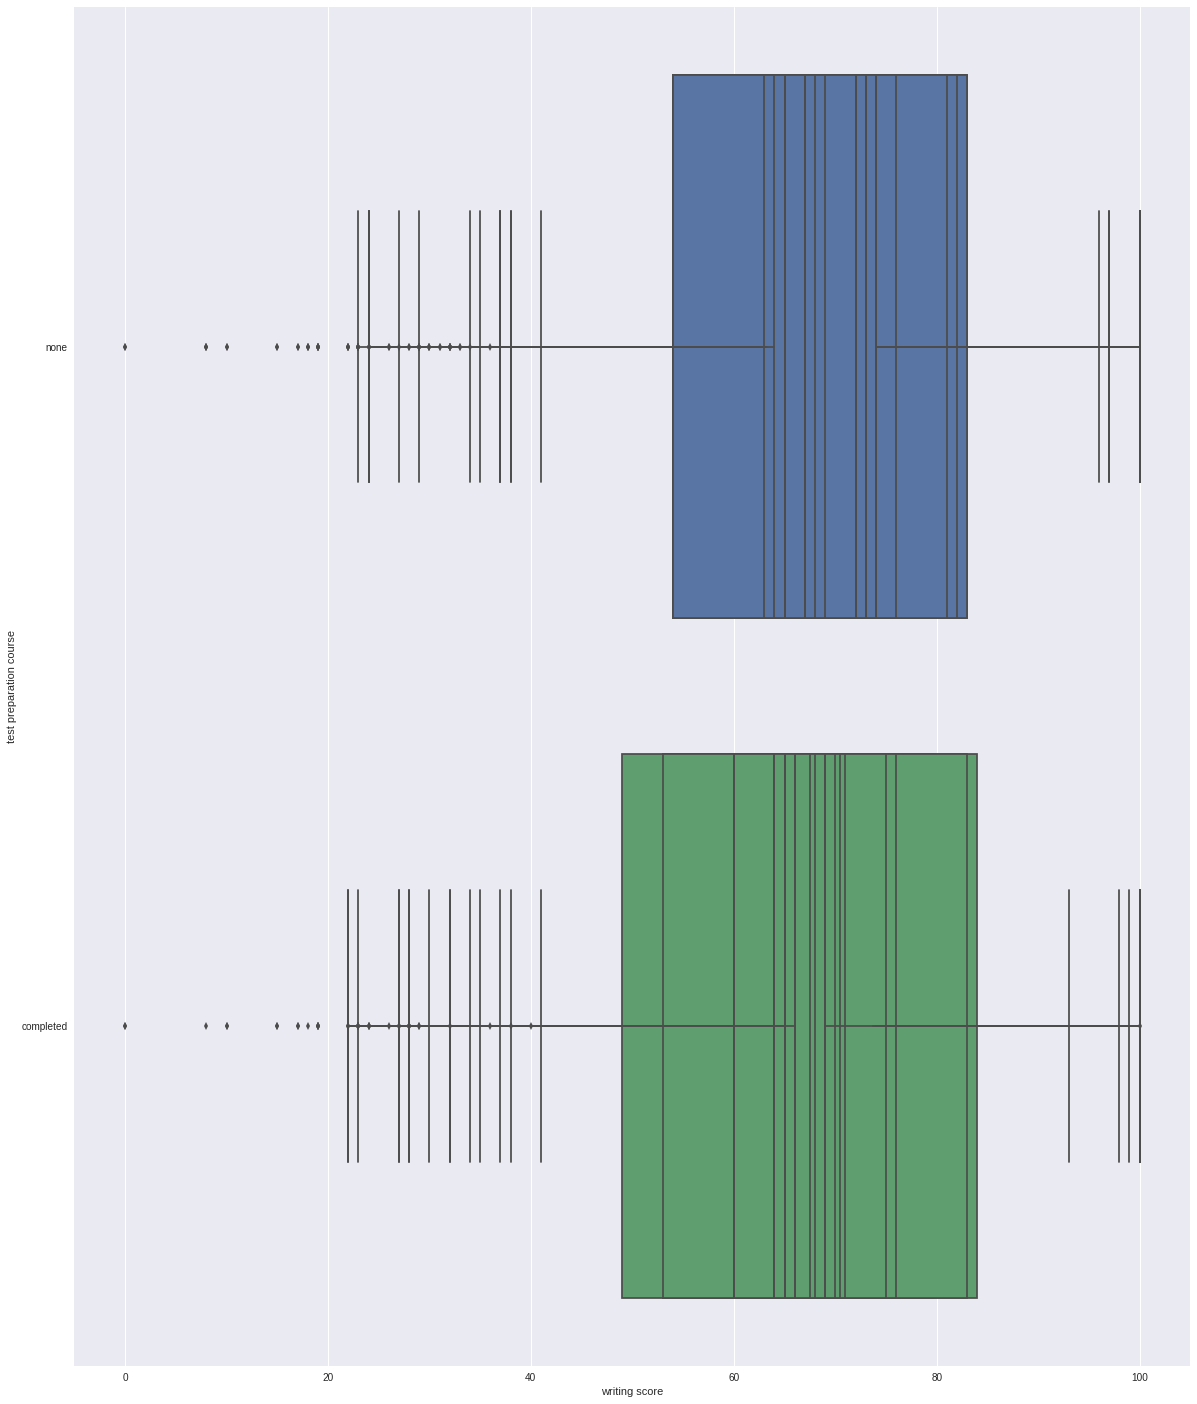

In [ ]:
# First of all, let us look at the dataset using the seaborn package.

## Sets the figure size
plt.figure(figsize=(20,25))

for i in  X:
  for j in  y:
    ## Plot the boxplot of the 32 first columns/covariates against the target variable
      sn.boxplot(data=data, y= i, x = j)
    ## insert each plot into a sub-figure 
  plt.subplot()
    
## Displays the plots into their corresponding sub-figures
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


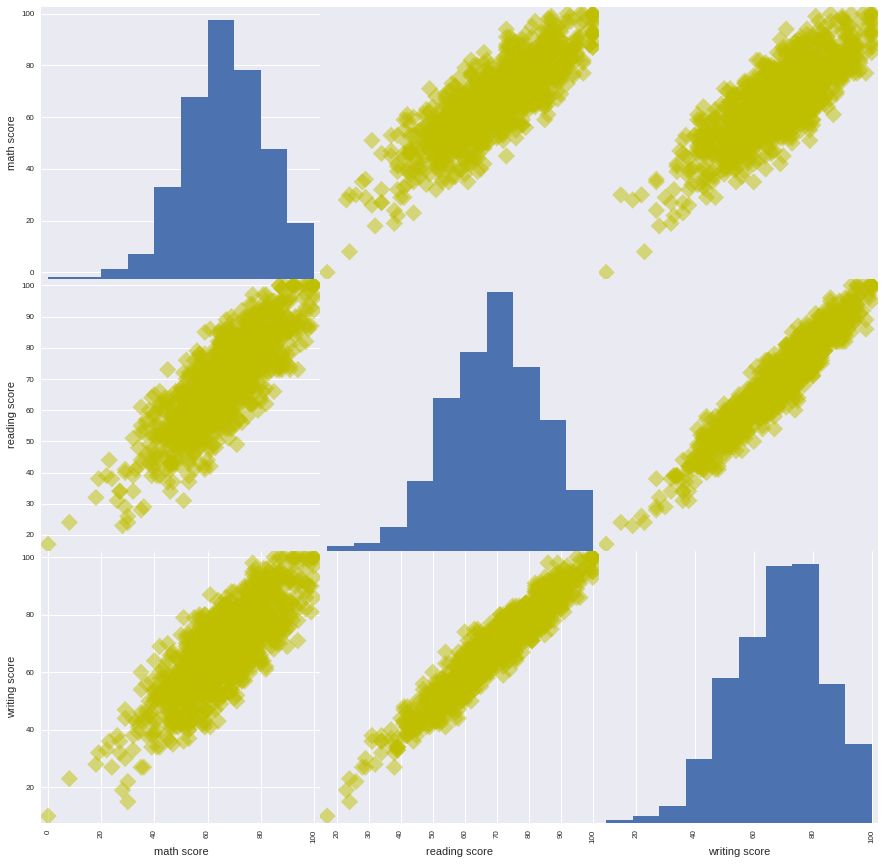

In [ ]:
# Show the mutual scatter plot of the first 10 attributes. When the scatter plot involves a 
# an attibute against itself, its histogram is display instead of the scatter plot.

pd.scatter_matrix(data.iloc[:,0:9], c='y', figsize=(15,15), s=150, marker='D')
plt.show()

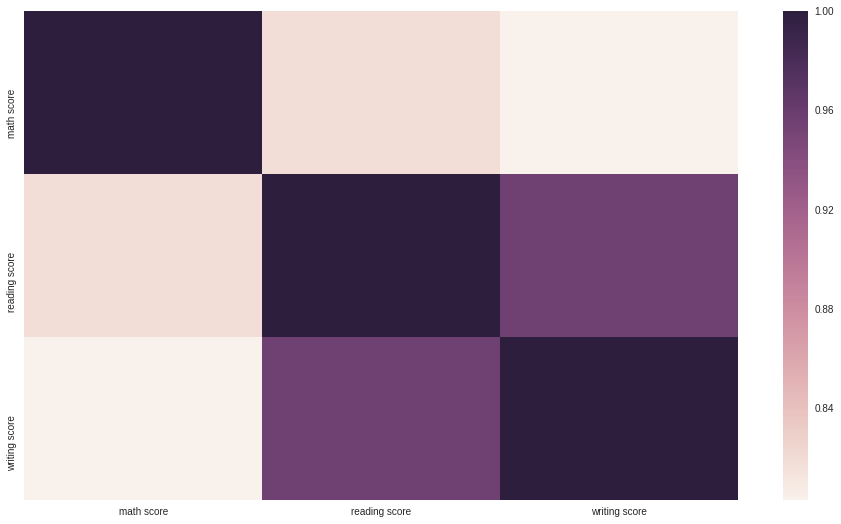

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
sn.heatmap(data.corr())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(y, y))

[[1.         0.9940028  0.9997031  ... 0.99708789 0.99841958 0.99894322]
 [0.9940028  1.         0.9956161  ... 0.9984241  0.99854149 0.99797131]
 [0.9997031  0.9956161  1.         ... 0.99858185 0.99920146 0.99948921]
 ...
 [0.99708789 0.9984241  0.99858185 ... 1.         0.99947218 0.99919427]
 [0.99841958 0.99854149 0.99920146 ... 0.99947218 1.         0.99994355]
 [0.99894322 0.99797131 0.99948921 ... 0.99919427 0.99994355 1.        ]]


In [ ]:
Num_measure=sp.spatial.distance.cdist(y, y, metric='euclidean', p=2, V=None, VI=None, w=None)


array([[ 0.        , 23.        , 34.84250278, ..., 15.84297952,
         7.81024968, 19.10497317],
       [23.        ,  0.        , 22.15851981, ..., 31.46426545,
        16.30950643,  9.16515139],
       [34.84250278, 22.15851981,  0.        , ..., 48.17675788,
        32.07802986, 17.29161647],
       ...,
       [15.84297952, 31.46426545, 48.17675788, ...,  0.        ,
        16.55294536, 31.46426545],
       [ 7.81024968, 16.30950643, 32.07802986, ..., 16.55294536,
         0.        , 15.03329638],
       [19.10497317,  9.16515139, 17.29161647, ..., 31.46426545,
        15.03329638,  0.        ]])

In [ ]:
num_measure=1/(1+Num_measure)
num_measure

array([[1.        , 0.04166667, 0.02789984, ..., 0.05937192, 0.11350416,
        0.04973894],
       [0.04166667, 1.        , 0.04318065, ..., 0.0308031 , 0.05777172,
        0.09837532],
       [0.02789984, 0.04318065, 1.        , ..., 0.02033481, 0.03023155,
        0.05466985],
       ...,
       [0.05937192, 0.0308031 , 0.02033481, ..., 1.        , 0.0569705 ,
        0.0308031 ],
       [0.11350416, 0.05777172, 0.03023155, ..., 0.0569705 , 1.        ,
        0.06237021],
       [0.04973894, 0.09837532, 0.05466985, ..., 0.0308031 , 0.06237021,
        1.        ]])

# Machine learning

In [ ]:
# Important packages
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error as mse

### Exemple of a base learner: Logistic regression (Log)

In [ ]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
LogisticRegression?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [ ]:
# Here we just copied and pasted the result from the command LogisticRegression?
'''
Init signature: LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
both dense and sparse input. Use C-ordered arrays or CSR matrices
containing 64-bit floats for optimal performance; any other input format
will be converted (and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation. The 'liblinear' solver supports both L1 and L2
regularization, with a dual formulation only for the L2 penalty.

Read more in the :ref:`User Guide <logistic_regression>`.

Parameters
----------
penalty : str, 'l1' or 'l2', default: 'l2'
    Used to specify the norm used in the penalization. The 'newton-cg',
    'sag' and 'lbfgs' solvers support only l2 penalties.

dual : bool, default: False
    Dual or primal formulation. Dual formulation is only implemented for
    l2 penalty with liblinear solver. Prefer dual=False when
    n_samples > n_features.

C : float, default: 1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.

fit_intercept : bool, default: True
    Specifies if a constant (a.k.a. bias or intercept) should be
    added to the decision function.

intercept_scaling : float, default 1.
    Useful only when the solver 'liblinear' is used
    and self.fit_intercept is set to True. In this case, x becomes
    [x, self.intercept_scaling],
    i.e. a "synthetic" feature with constant value equal to
    intercept_scaling is appended to the instance vector.
    The intercept becomes ``intercept_scaling * synthetic_feature_weight``.

    Note! the synthetic feature weight is subject to l1/l2 regularization
    as all other features.
    To lessen the effect of regularization on synthetic feature weight
    (and therefore on the intercept) intercept_scaling has to be increased.

class_weight : dict or 'balanced', default: None
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one.

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``.

    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.

    .. versionadded:: 0.17
       *class_weight='balanced'* instead of deprecated
       *class_weight='auto'*.

max_iter : int, default: 100
    Useful only for the newton-cg, sag and lbfgs solvers.
    Maximum number of iterations taken for the solvers to converge.

random_state : int seed, RandomState instance, default: None
    The seed of the pseudo random number generator to use when
    shuffling the data. Used only in solvers 'sag' and 'liblinear'.

solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag'}, default: 'liblinear'
    Algorithm to use in the optimization problem.

    - For small datasets, 'liblinear' is a good choice, whereas 'sag' is
        faster for large ones.
    - For multiclass problems, only 'newton-cg', 'sag' and 'lbfgs' handle
        multinomial loss; 'liblinear' is limited to one-versus-rest
        schemes.
    - 'newton-cg', 'lbfgs' and 'sag' only handle L2 penalty.

    Note that 'sag' fast convergence is only guaranteed on features with
    approximately the same scale. You can preprocess the data with a
    scaler from sklearn.preprocessing.

    .. versionadded:: 0.17
       Stochastic Average Gradient descent solver.

tol : float, default: 1e-4
    Tolerance for stopping criteria.

multi_class : str, {'ovr', 'multinomial'}, default: 'ovr'
    Multiclass option can be either 'ovr' or 'multinomial'. If the option
    chosen is 'ovr', then a binary problem is fit for each label. Else
    the loss minimised is the multinomial loss fit across
    the entire probability distribution. Works only for the 'newton-cg',
    'sag' and 'lbfgs' solver.

    .. versionadded:: 0.18
       Stochastic Average Gradient descent solver for 'multinomial' case.

verbose : int, default: 0
    For the liblinear and lbfgs solvers set verbose to any positive
    number for verbosity.

warm_start : bool, default: False
    When set to True, reuse the solution of the previous call to fit as
    initialization, otherwise, just erase the previous solution.
    Useless for liblinear solver.

    .. versionadded:: 0.17
       *warm_start* to support *lbfgs*, *newton-cg*, *sag* solvers.

n_jobs : int, default: 1
    Number of CPU cores used during the cross-validation loop. If given
    a value of -1, all cores are used.
'''

'\nInit signature: LogisticRegression(penalty=\'l2\', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=\'liblinear\', max_iter=100, multi_class=\'ovr\', verbose=0, warm_start=False, n_jobs=1)\nDocstring:     \nLogistic Regression (aka logit, MaxEnt) classifier.\n\nIn the multiclass case, the training algorithm uses the one-vs-rest (OvR)\nscheme if the \'multi_class\' option is set to \'ovr\', and uses the cross-\nentropy loss if the \'multi_class\' option is set to \'multinomial\'.\n(Currently the \'multinomial\' option is supported only by the \'lbfgs\',\n\'sag\' and \'newton-cg\' solvers.)\n\nThis class implements regularized logistic regression using the\n\'liblinear\' library, \'newton-cg\', \'sag\' and \'lbfgs\' solvers. It can handle\nboth dense and sparse input. Use C-ordered arrays or CSR matrices\ncontaining 64-bit floats for optimal performance; any other input format\nwill be converted (and copied).\n\nThe \

In [ ]:
## Sets up some of the relevant parameters of the learner
Log=LogisticRegression(penalty='l2',C=1.0, intercept_scaling=1, random_state=42, max_iter=100)

## Later on you can tune these parameters specifically  penalty in ['l1', 'l2'], 
## C between 0.2 and 5, ranfom_state between 0 and 100 and see how the affect the performance 
## of your learner.

In [ ]:
## Divides the dataset into X, variables, and y, target
X = data.drop('R', axis=1) # drop removes the column named 'R' out of the dataset 'data'
y = data.loc[:,'R'] # 'loc' is for 'location/localize'. Thus, we selected all the row of the column which is 
# localized by the name 'R' 

## Choses 90% of the data for training, (X_train,y_train), and reserves 10% for test (X_test, y_test) 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42, stratify = y)

## Trains the learner, Log, with the training dataset
Log.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = Log.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',Log.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           M       0.81      0.90      0.85       100
           R       0.87      0.76      0.81        86

   micro avg       0.83      0.83      0.83       186
   macro avg       0.84      0.83      0.83       186
weighted avg       0.84      0.83      0.83       186

Accuracy score:
 0.8333333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = Log.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',Log.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           M       0.67      0.91      0.77        11
           R       0.83      0.50      0.62        10

   micro avg       0.71      0.71      0.71        21
   macro avg       0.75      0.70      0.70        21
weighted avg       0.75      0.71      0.70        21

Accuracy score:
 0.7142857142857143


#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(Log, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.39534884 0.75609756 0.6097561  0.80487805 0.56097561]
Mean of the scores:  0.6254112308564946 
 with standard deviation 0.14602259623190936

Metric used:  precision_macro
Cross validation scores: [0.3961039  0.75735294 0.60661765 0.82875    0.56190476]
Mean of the scores:  0.6301458492487905 
 with standard deviation 0.1520600612023885

Metric used:  recall_macro
Cross validation scores: [0.39565217 0.75119617 0.60406699 0.8145933  0.56220096]
Mean of the scores:  0.6255419180361972 
 with standard deviation 0.14754793234330701


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

# Exercice: 
Repeat the steps above with one of the following base **learners**:

In [ ]:
# Select your learner
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC  


In [ ]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


# Exercice1: KNeighborsClassifier

Repeat the steps above with one of the following base learners:

In [ ]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
KNeighborsClassifier?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)


In [ ]:
#neigh.fit(X, y)
neigh.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = neigh.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           M       0.89      0.93      0.91       100
           R       0.91      0.87      0.89        86

   micro avg       0.90      0.90      0.90       186
   macro avg       0.90      0.90      0.90       186
weighted avg       0.90      0.90      0.90       186

Accuracy score:
 0.9032258064516129


In [ ]:
# In order to get familiar with the parameters of your learner, use learner?

#<< YOUR CODE HERE

In [ ]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = neigh.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           M       0.60      0.82      0.69        11
           R       0.67      0.40      0.50        10

   micro avg       0.62      0.62      0.62        21
   macro avg       0.63      0.61      0.60        21
weighted avg       0.63      0.62      0.60        21

Accuracy score:
 0.6190476190476191


In [ ]:
# Copy and paste the result
#<< YOUR RESULT HERE

In [ ]:
# Read the result in order to understand why and when to use the parameters.
# It is normal if you don't apprehend the meaning of all the parameters.
# Select the parameters that you have well understood and feed/train your learner with the training set

#<< YOUR CODE HERE

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(neigh, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.55813953 0.65853659 0.58536585 0.53658537 0.29268293]
Mean of the scores:  0.5262620533182075 
 with standard deviation 0.12383195386255794

Metric used:  precision_macro
Cross validation scores: [0.55735931 0.65952381 0.58851675 0.53947368 0.29289216]
Mean of the scores:  0.5275531408735743 
 with standard deviation 0.12428121572878659

Metric used:  recall_macro
Cross validation scores: [0.5576087  0.66028708 0.58851675 0.53947368 0.29784689]
Mean of the scores:  0.5287466195132098 
 with standard deviation 0.12258722252698798


In [ ]:
# Make a prediction based on your training dataset

#<< YOUR CODE HERE

In [ ]:
# Print the classification report and the average accuracy


#<< YOUR CODE HERE
#<< YOUR CODE HERE

In [ ]:
# Make a prediction based on your testing dataset

#<< YOUR CODE HERE

# Print the classification report and the average accuracy


#<< YOUR CODE HERE
#<< YOUR CODE HERE

In [ ]:
from sklearn.model_selection import CatBoostClassifier


ImportError: ignored

In [ ]:
# Compare the two learners

In [ ]:
# Try to implement cross validation here

# Exercice:  SGDClassifier
Repeat the steps above with one of the following base **learners**:

In [ ]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
SGDClassifier?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [ ]:
SDG=SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False, n_iter=None)

In [ ]:
#neigh.fit(X, y)
SDG.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = SDG.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',SDG.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           M       0.89      0.39      0.54       100
           R       0.57      0.94      0.71        86

   micro avg       0.65      0.65      0.65       186
   macro avg       0.73      0.67      0.63       186
weighted avg       0.74      0.65      0.62       186

Accuracy score:
 0.6451612903225806


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [ ]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = SDG.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',SDG.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           M       0.80      0.36      0.50        11
           R       0.56      0.90      0.69        10

   micro avg       0.62      0.62      0.62        21
   macro avg       0.68      0.63      0.60        21
weighted avg       0.69      0.62      0.59        21

Accuracy score:
 0.6190476190476191


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(SDG, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.37209302 0.65853659 0.68292683 0.85365854 0.56097561]
Mean of the scores:  0.6256381168462848 
 with standard deviation 0.15800251385777406

Metric used:  precision_macro
Cross validation scores: [0.325      0.75454545 0.7375     0.80645161 0.58851675]
Mean of the scores:  0.6424027627720327 
 with standard deviation 0.17445899784790483

Metric used:  recall_macro
Cross validation scores: [0.475      0.72129187 0.68779904 0.72368421 0.71770335]
Mean of the scores:  0.6650956937799043 
 with standard deviation 0.09592706015480436


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

# Exercice:  DecisionTreeClassifier
Repeat the steps above with one of the following base **learners**:

In [ ]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
DecisionTreeClassifier?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [ ]:
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)


In [ ]:
#neigh.fit(X, y)
DTC.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = DTC.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',DTC.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           M       1.00      1.00      1.00       100
           R       1.00      1.00      1.00        86

   micro avg       1.00      1.00      1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186

Accuracy score:
 1.0


In [ ]:
# In order to get familiar with the parameters of your learner, use learner?

#<< YOUR CODE HERE

In [ ]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = DTC.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',DTC.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           M       0.69      0.82      0.75        11
           R       0.75      0.60      0.67        10

   micro avg       0.71      0.71      0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21

Accuracy score:
 0.7142857142857143


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(DTC, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.53488372 0.70731707 0.6097561  0.80487805 0.73170732]
Mean of the scores:  0.6777084515031196 
 with standard deviation 0.09484838480553316

Metric used:  precision_macro
Cross validation scores: [0.58225108 0.65952381 0.61071429 0.79534314 0.74242424]
Mean of the scores:  0.6780513114336644 
 with standard deviation 0.07994557388621895

Metric used:  recall_macro
Cross validation scores: [0.42391304 0.63755981 0.56578947 0.81100478 0.71770335]
Mean of the scores:  0.6311940919492407 
 with standard deviation 0.13198443569006646


In [ ]:
GaussianNB

# Exercice:  GaussianNB
Repeat the steps above with one of the following base **learners**:

In [ ]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
GaussianNB?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [ ]:
GNB=GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#neigh.fit(X, y)
GNB.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = GNB.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',GNB.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           M       0.84      0.58      0.69       100
           R       0.64      0.87      0.74        86

   micro avg       0.72      0.72      0.72       186
   macro avg       0.74      0.73      0.71       186
weighted avg       0.75      0.72      0.71       186

Accuracy score:
 0.7150537634408602


In [ ]:
# In order to get familiar with the parameters of your learner, use learner?

#<< YOUR CODE HERE

In [ ]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = GNB.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',GNB.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           M       0.71      0.45      0.56        11
           R       0.57      0.80      0.67        10

   micro avg       0.62      0.62      0.62        21
   macro avg       0.64      0.63      0.61        21
weighted avg       0.65      0.62      0.61        21

Accuracy score:
 0.6190476190476191


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(GNB, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.62790698 0.85365854 0.7804878  0.73170732 0.19512195]
Mean of the scores:  0.6377765173000567 
 with standard deviation 0.23316733291849734

Metric used:  precision_macro
Cross validation scores: [0.62878788 0.85287081 0.81282051 0.81666667 0.16346154]
Mean of the scores:  0.6549214820267452 
 with standard deviation 0.25787337505727814

Metric used:  recall_macro
Cross validation scores: [0.62934783 0.85287081 0.79186603 0.75       0.2069378 ]
Mean of the scores:  0.6462044934470563 
 with standard deviation 0.23149131036995893


# Exercice:  MLPClassifier
Repeat the steps above with one of the following base **learners**:

In [ ]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
MLPClassifier?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [ ]:
MLP=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

In [ ]:
#neigh.fit(X, y)
MLP.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = MLP.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',MLP.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           M       0.92      0.95      0.94       100
           R       0.94      0.91      0.92        86

   micro avg       0.93      0.93      0.93       186
   macro avg       0.93      0.93      0.93       186
weighted avg       0.93      0.93      0.93       186

Accuracy score:
 0.9301075268817204


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# In order to get familiar with the parameters of your learner, use learner?

#<< YOUR CODE HERE

In [ ]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = MLP.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',MLP.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           M       0.69      1.00      0.81        11
           R       1.00      0.50      0.67        10

   micro avg       0.76      0.76      0.76        21
   macro avg       0.84      0.75      0.74        21
weighted avg       0.84      0.76      0.74        21

Accuracy score:
 0.7619047619047619


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(MLP, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Metric used:  accuracy
Cross validation scores: [0.44186047 0.68292683 0.58536585 0.75609756 0.65853659]
Mean of the scores:  0.6249574588769143 
 with standard deviation 0.10656241020710751


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Metric used:  precision_macro
Cross validation scores: [0.41774892 0.70574163 0.5821256  0.82758621 0.68375   ]
Mean of the scores:  0.6433904710608924 
 with standard deviation 0.13719484088778028


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Metric used:  recall_macro
Cross validation scores: [0.4423913  0.67942584 0.58133971 0.79545455 0.67942584]
Mean of the scores:  0.635607447472436 
 with standard deviation 0.1180412320239142


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Exercice:  SVC
Repeat the steps above with one of the following base **learners**:

In [ ]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
SVC?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [ ]:
SVClass=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)

In [ ]:
#neigh.fit(X, y)

SVClass.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = SVClass.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',SVClass.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           M       0.63      0.95      0.76       100
           R       0.86      0.36      0.51        86

   micro avg       0.68      0.68      0.68       186
   macro avg       0.75      0.66      0.63       186
weighted avg       0.74      0.68      0.64       186

Accuracy score:
 0.6774193548387096


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# In order to get familiar with the parameters of your learner, use learner?

#<< YOUR CODE HERE

In [ ]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = SVClass.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',SVClass.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           M       0.56      0.91      0.69        11
           R       0.67      0.20      0.31        10

   micro avg       0.57      0.57      0.57        21
   macro avg       0.61      0.55      0.50        21
weighted avg       0.61      0.57      0.51        21

Accuracy score:
 0.5714285714285714


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(SVClass, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.58139535 0.58536585 0.56097561 0.63414634 0.31707317]
Mean of the scores:  0.535791264889393 
 with standard deviation 0.11196691417607811

Metric used:  precision_macro
Cross validation scores: [0.65705128 0.78205128 0.55494505 0.7972973  0.31339713]
Mean of the scores:  0.6209484091063039 
 with standard deviation 0.17737007414611297

Metric used:  recall_macro
Cross validation scores: [0.55326087 0.55263158 0.54784689 0.60526316 0.31339713]
Mean of the scores:  0.5144799251092157 
 with standard deviation 0.10271197676742552


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 